## Import packages

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
import seaborn as sns

## Read the data file and review the dataframe

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.set_index('id', inplace=True)
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


## General info about the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  float64
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

## Check the missing values in the dataset

In [4]:
df.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

## Data Cleaning

### Re-format the type of the 'date' column

In [5]:
df['date'] = pd.to_datetime(df['date'])
print(df['date'].dtype)

datetime64[ns]


### Deal with missing values

The NaN values in the 'waterfront' column is about 11% of the column data. Therefore, we can drop this column

In [6]:
df = df.drop('waterfront', axis=1).copy()

In [7]:
# Summarizing the data values in 'view' column
df.groupby(by = 'view')['view'].count().sort_values(ascending = False)

view
0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

Most of the values (about 90%) in 'view' column are 0.0  and the missing values are only 0.29% of the column data. Therefore, the NaN values in this column are replaced with 0.0 

In [8]:
# Replace NaN with 0.0 and check the missing values again
df['view'] = df['view'].fillna(0.0)
df['view'].isna().sum()

0

In [9]:
# Summarizing the data values in 'yr_renovated' column
df.groupby(by = 'yr_renovated')['yr_renovated'].count().sort_values(ascending = False)

yr_renovated
0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1954.0        1
1971.0        1
1959.0        1
Name: yr_renovated, Length: 70, dtype: int64

Most of the values (about 79%) in the 'yr_renovated' columns are 0.0 which means that the renovated year for most of the houses are unknown. Therefore, it is best to drop the column as replacing NaN with the median of the coumn is useless.

In [10]:
df = df.drop('yr_renovated', axis=1).copy()

In [11]:
# Summarizing the data values in 'sqft_basement' column
df.groupby(by = 'sqft_basement')['sqft_basement'].count().sort_values(ascending = False)

sqft_basement
0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
2360.0        1
2350.0        1
2310.0        1
2300.0        1
2190.0        1
Name: sqft_basement, Length: 304, dtype: int64

The footage of the basement (sqft_basement2) is equal to the footage of the living space (sqft_living) minus the footage of the house apart from the basement (sqft_above). Therefore, we created a new a column, named 'sqft_basement2' , calculated the footage of the basement and inserted the calculated values into this new column

In [12]:
from numpy import float64
df['sqft_basement2'] = (df['sqft_living'] - df['sqft_above'])
df['sqft_basement2'] = df['sqft_basement2'].astype(float64)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement2
id,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650,0.0
6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639,400.0
5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062,0.0
2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000,910.0
1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503,0.0


Checking the data values in 'sqft_basement2' to make sure they are in float form and also no missing values

In [13]:
# Summarizing the data values in 'sqft_basement2' column
df.groupby(by = 'sqft_basement2')['sqft_basement2'].count().sort_values(ascending = False)

sqft_basement2
0.0       13110
600.0       221
700.0       218
500.0       214
800.0       206
          ...  
2360.0        1
475.0         1
2350.0        1
1930.0        1
4820.0        1
Name: sqft_basement2, Length: 306, dtype: int64

In [14]:
df['sqft_basement2'].isna().sum()

0

We now can drop the original 'sqft_basement' column.

In [15]:
df = df.drop('sqft_basement', axis=1).copy()

In [16]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement2
id,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,1955,98178,47.5112,-122.257,1340,5650,0.0
6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,1951,98125,47.7210,-122.319,1690,7639,400.0
5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,1933,98028,47.7379,-122.233,2720,8062,0.0
2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,1965,98136,47.5208,-122.393,1360,5000,910.0
1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,1987,98074,47.6168,-122.045,1800,7503,0.0


In [17]:
# Rename the 'sqft_basement2' back to 'sqft_basement'
df = df.rename(columns={'sqft_basement2':'sqft_basement'}).copy()
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement
id,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,1955,98178,47.5112,-122.257,1340,5650,0.0
6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,1951,98125,47.7210,-122.319,1690,7639,400.0
5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,1933,98028,47.7379,-122.233,2720,8062,0.0
2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,1965,98136,47.5208,-122.393,1360,5000,910.0
1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,1987,98074,47.6168,-122.045,1800,7503,0.0


Check the dataset general information and missing values again

In [18]:
print(df.info())
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   view           21597 non-null  float64       
 8   condition      21597 non-null  int64         
 9   grade          21597 non-null  int64         
 10  sqft_above     21597 non-null  int64         
 11  yr_built       21597 non-null  int64         
 12  zipcode        21597 non-null  int64         
 13  lat            21597 non-null  float64       
 14  long           21597 non-null  float64       
 15  sqft_

### Checking for outliers 

In [19]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.233181,3.409825,7.657915,1788.596842,1970.999676,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,291.725008
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.764673,0.650546,1.173200,827.759761,29.375234,53.513072,0.138552,0.140724,685.230472,27274.441950,442.667800
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,1975.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,560.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,9410.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,4820.000000


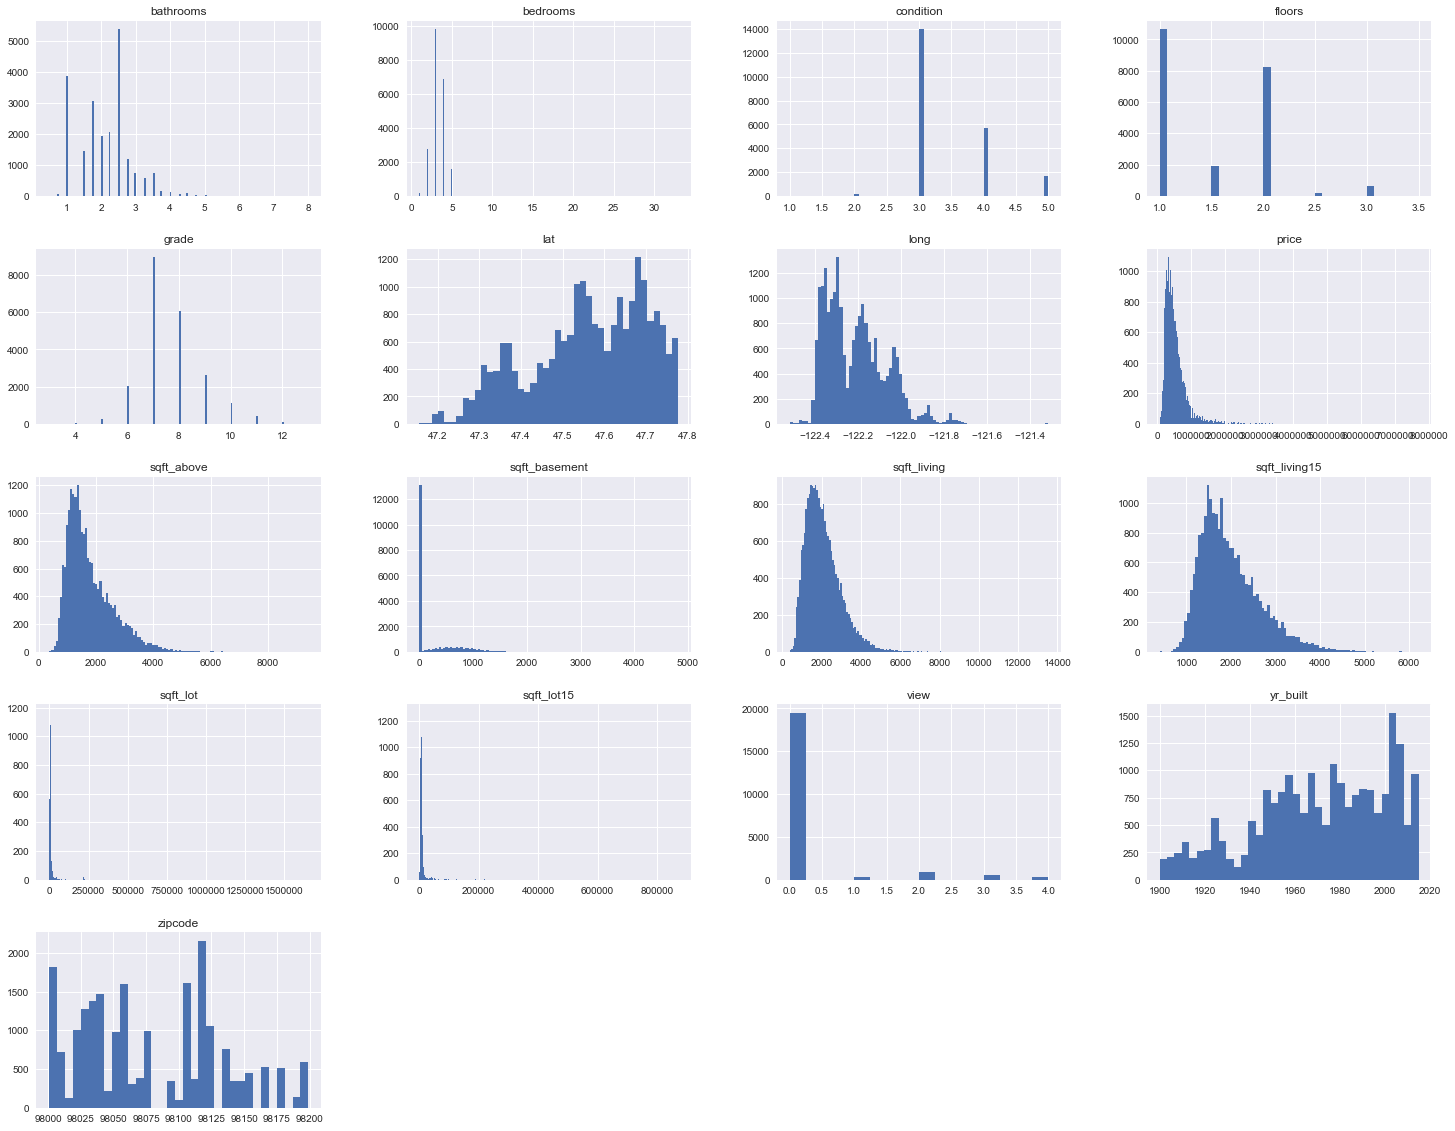

In [20]:
df.hist(figsize=(25,20), bins='auto');

There are a lot of unrealistic outliers in the dataset. For instance, the number of bedrooms run to more than 30 bedrooms ot the sale price of the house run to more $8 millions dollars. Therefore, we omit theses outliers for more accurate final results. 

In [21]:
# Limit the number of bathrooms to 6
df = df.loc[(df['bathrooms'] <= 6)].copy()

In [22]:
# Limit the number of bathrooms to 15
df = df.loc[(df['bedrooms'] <= 15)].copy()

In [23]:
# Limit the price to 6000000
df = df.loc[(df['price'] <= 6000000)].copy()

In [24]:
# Limit the footage of the house apart from basement to 6500
df = df.loc[(df['sqft_above'] <= 6500)].copy()

In [25]:
# Limit the footage of the basement to 2000
df = df.loc[(df['sqft_basement'] <= 2000)].copy()

In [26]:
# Limit the footage of the house to 9000
df = df.loc[(df['sqft_living'] <= 9000)].copy()

In [34]:
# Limit the footage of the lot to 150000
df = df.loc[(df['sqft_lot'] <= 150000)].copy()

In [35]:
# Limit the footage of the lot of the nearest 15 neighbors to 150000
df = df.loc[(df['sqft_lot15'] <= 150000)].copy()

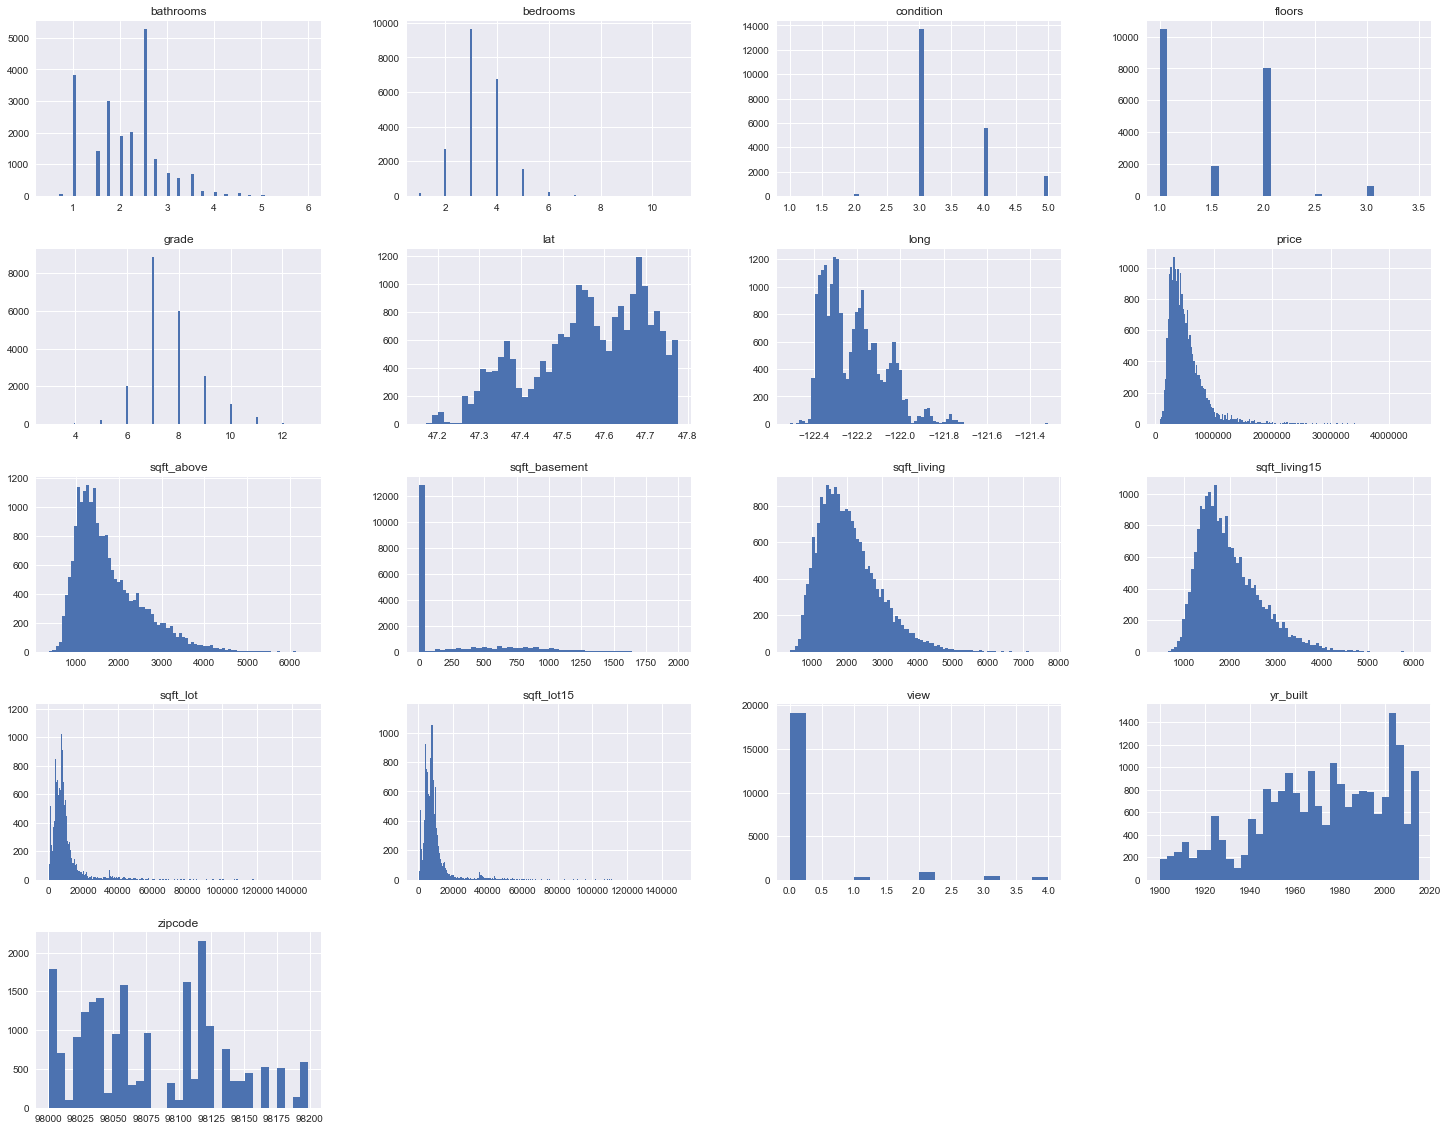

In [36]:
# Plot the dataset again
df.hist(figsize=(25,20), bins='auto');

## Saving the cleaned data to a new CSV file

Save the clean data into 'cleaned_kc_house_data.csv' for later analysis 

In [37]:
df.to_csv('cleaned_kc_house_data.csv')